### Importing Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

### Data Creation

In [2]:
#Digit MNIST dataset
(X_train_digit,y_train_digit),(X_test_digit,y_test_digit)=mnist.load_data()

In [3]:
#checking train set - input data
X_train_digit[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
#checking train set - output data
y_train_digit[3]

1

### Data Preprocessing

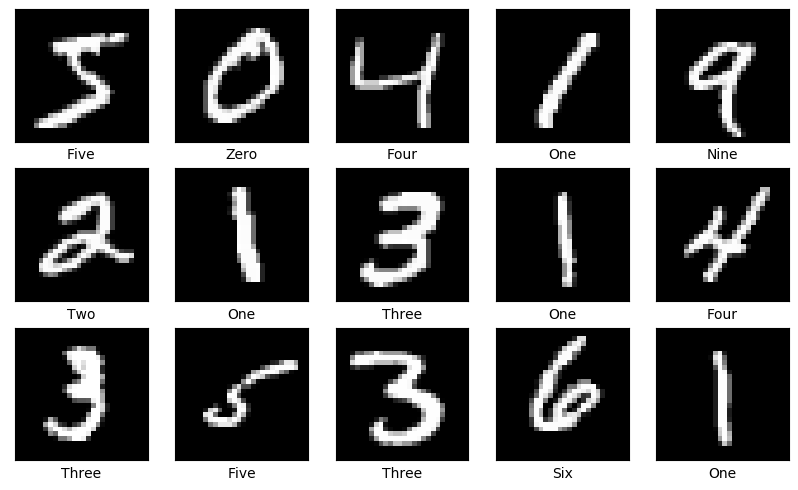

In [5]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [6]:
#checking shape of input train set
X_train_digit.shape

(60000, 28, 28)

In [7]:
#checking shape of input test set
X_test_digit.shape

(10000, 28, 28)

In [8]:
# Shape of input dataset should in 2D

#Reshaping 3D into 2D

X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [9]:
#checking shape of output train set
y_train_digit.shape

(60000,)

In [10]:
#checking shape of output test set
y_test_digit.shape

(10000,)

In [11]:
# output dataset should in class


#Encoding Digit MNIST Labels for output train/test set

y_train_digit = to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [12]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
# As per above output dataset has been changed to class

# ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
# [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

# output is 'Zero'

### Model Creation

#### Threesteps involves on creating model
#### 1.Sequential
#### 2.compile
#### 3.fit

In [15]:
# 1. Sequential
# Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

In [16]:
# checking summary of model
# how to calculate param # ? - Ans : param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 2.Compile
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [18]:
# 3.Fit
# fitting model

history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 8s 9ms/step - loss: 1.5052 - accuracy: 0.8463 - val_loss: 0.3561 - val_accuracy: 0.9099
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2731 - accuracy: 0.9276 - val_loss: 0.2318 - val_accuracy: 0.9412
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1944 - accuracy: 0.9470 - val_loss: 0.2003 - val_accuracy: 0.9475
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1479 - accuracy: 0.9584 - val_loss: 0.2123 - val_accuracy: 0.9494
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1256 - accuracy: 0.9634 - val_loss: 0.1602 - val_accuracy: 0.9607
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1077 - accuracy: 0.9691 - val_loss: 0.1859 - val_accuracy: 0.9534
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1025 - accuracy: 0.9703 - val_loss: 0.1588 - val_accuracy: 0.9610
Epoch 

### Testing a model

In [19]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)

313/313 [==============================] - 1s 3ms/step


In [20]:
y_predict[0]

array([0.9999845 , 1.        , 0.9999996 , 1.        , 0.41274703,
       0.9999869 , 0.46647397, 1.        , 0.9999754 , 1.        ],
      dtype=float32)

In [21]:
# Here we get the index of maximum value in the encoded vector
y_predicts=np.argmax(y_predict, axis=1) 

In [22]:
y_predicts

array([1, 1, 1, ..., 4, 0, 0], dtype=int64)

In [23]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [24]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

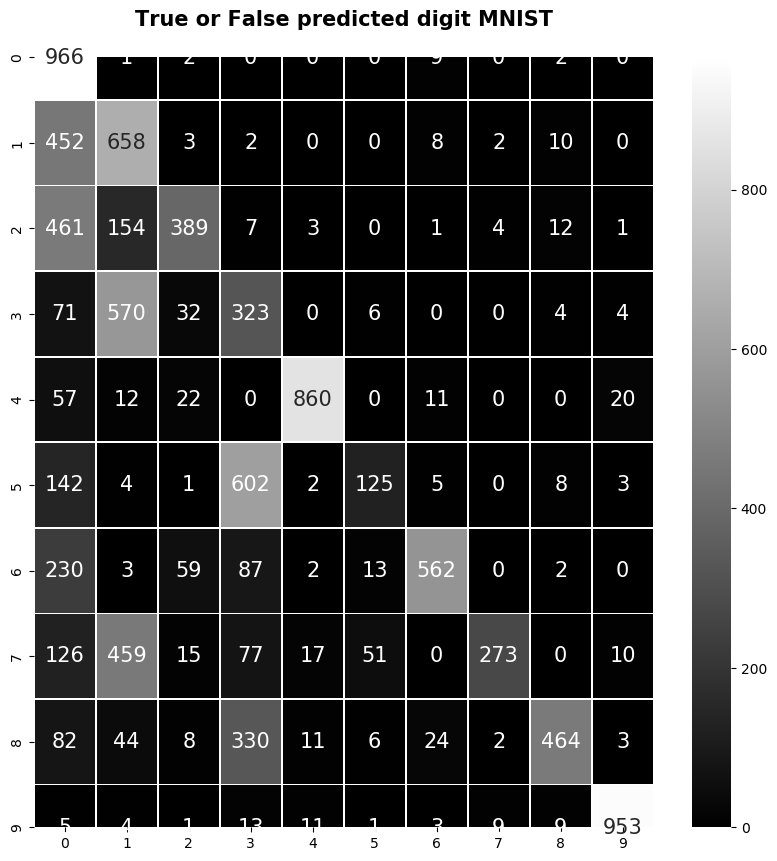

In [25]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.37      0.99      0.54       980
           1       0.34      0.58      0.43      1135
           2       0.73      0.38      0.50      1032
           3       0.22      0.32      0.26      1010
           4       0.95      0.88      0.91       982
           5       0.62      0.14      0.23       892
           6       0.90      0.59      0.71       958
           7       0.94      0.27      0.41      1028
           8       0.91      0.48      0.62       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.56     10000
   macro avg       0.70      0.56      0.56     10000
weighted avg       0.69      0.56      0.56     10000



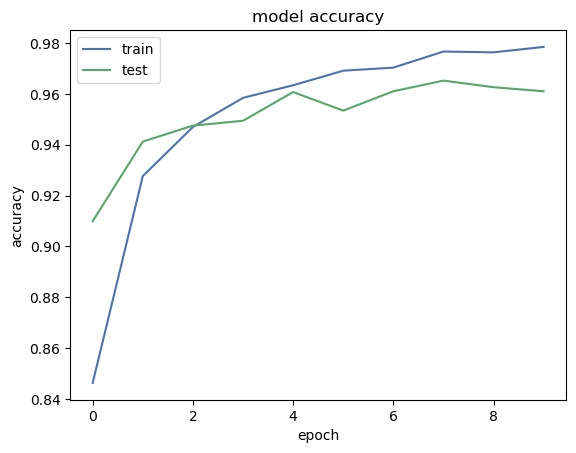

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


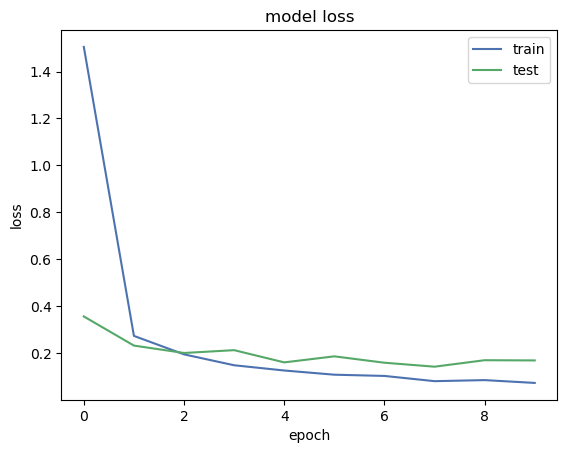

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [29]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 166ms/step


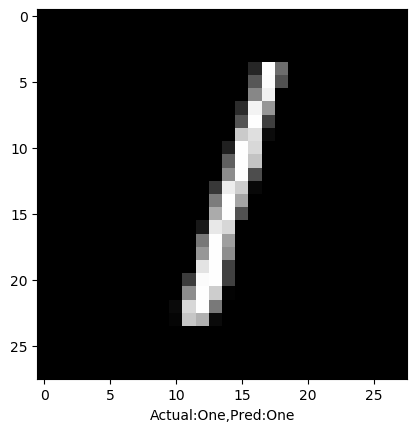

In [30]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()